<a href="https://colab.research.google.com/github/chetanbalaji-star/dog-cat-classification/blob/main/dog_cat_classification.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

install the dependencies

In [4]:
!mkdir -p ~/.kaggle
!cp kaggle.json ~/.kaggle/
!chmod 600 ~/.kaggle/kaggle.json

download the api new key kaggle dataset

In [5]:
!kaggle datasets download -d salader/dogs-vs-cats

Dataset URL: https://www.kaggle.com/datasets/salader/dogs-vs-cats
License(s): unknown


extract all the files from zipfile

In [6]:
import zipfile
zip_ref = zipfile.ZipFile('/content/dogs-vs-cats.zip', 'r')
zip_ref.extractall('/content')
zip_ref.close()

import the libraries

In [ ]:
import tensorflow as tf
from tensorflow import keras
from keras import Sequential
from keras.layers import Dense,Conv2D,MaxPooling2D,Flatten,BatchNormalization,Dropout

train the directory

In [ ]:
#generators
train_ds= keras.utils.image_dataset_from_directory(
    directory = '/content/train',
    labels='inferred',
    label_mode = 'int',
    batch_size=32,
    image_size=(256,256)
)

validation_ds = keras.utils.image_dataset_from_directory(
    directory = '/content/test',
    labels='inferred',
    label_mode = 'int',
    batch_size=32,
    image_size=(256,256)
)

Found 20000 files belonging to 2 classes.
Found 5000 files belonging to 2 classes.


normalize the dataset

In [ ]:
#normalize
def process(image,labels):
  image = tf.cast(img/255. ,tf.float32)
  return image,label
  train_ds = train_ds.map(process)
  validation_ds = validation_ds.map(process)

create the cnn model

In [ ]:
# create cnn model
model = Sequential()
model.add(Conv2D(32,kernel_size=(3,3),padding='valid',activation='relu',input_shape=(256,256,3)))
model.add(BatchNormalization())
model.add(MaxPooling2D(pool_size=(2,2),strides=2,padding='valid'))
model.add(Conv2D(64,kernel_size=(3,3),padding='valid',activation='relu'))
model.add(BatchNormalization())
model.add(MaxPooling2D(pool_size=(2,2),strides=2,padding='valid'))
model.add(Conv2D(128,kernel_size=(3,3),padding='valid',activation='relu'))
model.add(BatchNormalization())
model.add(MaxPooling2D(pool_size=(2,2),strides=2,padding='valid'))
model.add(Flatten())
model.add(Dense(128,activation='relu'))
model.add(Dropout(0.1))
model.add(Dense(64,activation='relu'))
model.add(Dropout(0.1))
model.add(Dense(1,activation='sigmoid'))

/usr/local/lib/python3.11/dist-packages/keras/src/layers/convolutional/base_conv.py:107: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


In [ ]:
model.summary()

Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ conv2d (Conv2D)                      │ (None, 254, 254, 32)        │             896 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d (MaxPooling2D)         │ (None, 127, 127, 32)        │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_1 (Conv2D)                    │ (None, 125, 125, 64)        │          18,496 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d_1 (MaxPooling2D)       │ (None, 62, 62, 64)          │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_2 (Conv2D)                    │ (None, 60, 60, 128)         │          73,856 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d_2 (MaxPooling2D)       │ (None, 30, 30, 128)         │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ flatten (Flatten)                    │ (None, 115200)              │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense (Dense)                        │ (None, 128)                 │      14,745,728 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout (Dropout)                    │ (None, 128)                 │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_1 (Dense)                      │ (None, 64)                  │           8,256 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout_1 (Dropout)                  │ (None, 64)                  │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_2 (Dense)                      │ (None, 1)                   │              65 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 14,847,297 (56.64 MB)

 Trainable params: 14,847,297 (56.64 MB)

 Non-trainable params: 0 (0.00 B)

In [ ]:
model.compile(optimizer='adam',loss='binary_crossentropy',metrics=['accuracy'])

In [ ]:
model.fit(train_ds,epochs=10,validation_data=validation_ds)

Epoch 1/10
625/625 ━━━━━━━━━━━━━━━━━━━━ 56s 75ms/step - accuracy: 0.5168 - loss: 14.7720 - val_accuracy: 0.5342 - val_loss: 0.6902
Epoch 2/10
625/625 ━━━━━━━━━━━━━━━━━━━━ 72s 70ms/step - accuracy: 0.5490 - loss: 0.6912 - val_accuracy: 0.5314 - val_loss: 0.6891
Epoch 3/10
625/625 ━━━━━━━━━━━━━━━━━━━━ 42s 68ms/step - accuracy: 0.5707 - loss: 0.6761 - val_accuracy: 0.5616 - val_loss: 0.6900
Epoch 4/10
625/625 ━━━━━━━━━━━━━━━━━━━━ 82s 68ms/step - accuracy: 0.6077 - loss: 0.6363 - val_accuracy: 0.5624 - val_loss: 0.6966
Epoch 5/10
625/625 ━━━━━━━━━━━━━━━━━━━━ 82s 68ms/step - accuracy: 0.6411 - loss: 0.5914 - val_accuracy: 0.5624 - val_loss: 0.7301
Epoch 6/10
625/625 ━━━━━━━━━━━━━━━━━━━━ 82s 69ms/step - accuracy: 0.6565 - loss: 0.6834 - val_accuracy: 0.5494 - val_loss: 0.7775
Epoch 7/10
625/625 ━━━━━━━━━━━━━━━━━━━━ 86s 75ms/step - accuracy: 0.6625 - loss: 0.5670 - val_accuracy: 0.5538 - val_loss: 0.8215
Epoch 8/10
625/625 ━━━━━━━━━━━━━━━━━━━━ 82s 75ms/step - accuracy: 0.6831 - loss: 0.5323 -

Epoch 1/10
625/625 ━━━━━━━━━━━━━━━━━━━━ 47s 75ms/step - accuracy: 0.7606 - loss: 0.4223 - val_accuracy: 0.5482 - val_loss: 1.0812
Epoch 2/10
625/625 ━━━━━━━━━━━━━━━━━━━━ 82s 76ms/step - accuracy: 0.7841 - loss: 0.3851 - val_accuracy: 0.5704 - val_loss: 1.2961
Epoch 3/10
625/625 ━━━━━━━━━━━━━━━━━━━━ 77s 67ms/step - accuracy: 0.7887 - loss: 0.3971 - val_accuracy: 0.5540 - val_loss: 1.2505
Epoch 4/10
625/625 ━━━━━━━━━━━━━━━━━━━━ 46s 74ms/step - accuracy: 0.8206 - loss: 0.3320 - val_accuracy: 0.5658 - val_loss: 1.4007
Epoch 5/10
625/625 ━━━━━━━━━━━━━━━━━━━━ 47s 74ms/step - accuracy: 0.8304 - loss: 0.3176 - val_accuracy: 0.5524 - val_loss: 1.4229
Epoch 6/10
625/625 ━━━━━━━━━━━━━━━━━━━━ 82s 75ms/step - accuracy: 0.8349 - loss: 0.3070 - val_accuracy: 0.5860 - val_loss: 1.6823
Epoch 7/10
625/625 ━━━━━━━━━━━━━━━━━━━━ 77s 67ms/step - accuracy: 0.8559 - loss: 0.2758 - val_accuracy: 0.5898 - val_loss: 1.6898
Epoch 8/10
625/625 ━━━━━━━━━━━━━━━━━━━━ 82s 68ms/step - accuracy: 0.8654 - loss: 0.2684 - 

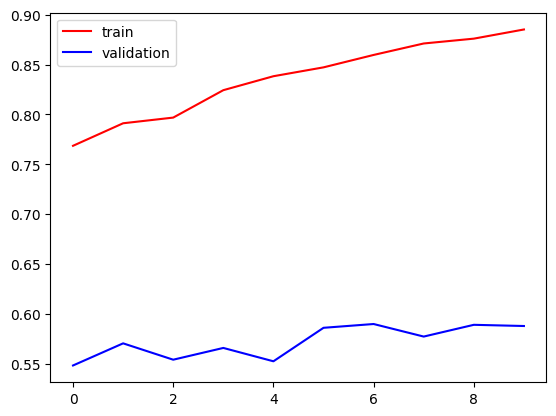

In [ ]:
import matplotlib.pyplot as plt

# Assign the output of model.fit to the history variable
history = model.fit(train_ds,epochs=10,validation_data=validation_ds)

plt.plot(history.history['accuracy'],color='red',label='train')
plt.plot(history.history['val_accuracy'],color='blue',label='validation')
plt.legend()
plt.show()

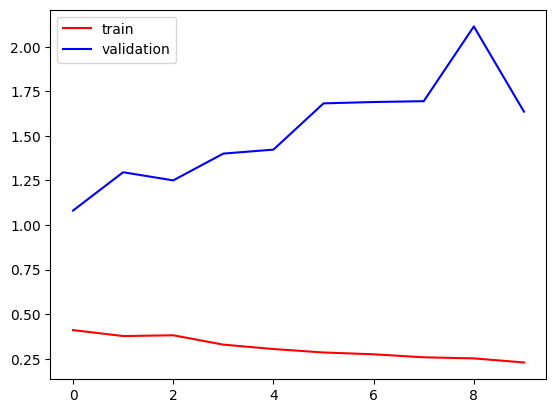

In [ ]:
plt.plot(history.history['loss'],color='red',label='train')
plt.plot(history.history['val_loss'],color='blue',label='validation')
plt.legend()
plt.show()

In [ ]:

import matplotlib.pyplot as plt
import tensorflow as tf
import pandas as pd
import numpy as np

import warnings
warnings.filterwarnings('ignore')

from tensorflow import keras
from keras import layers
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Activation, Dropout, Flatten, Dense
from tensorflow.keras.layers import Conv2D, MaxPooling2D
from tensorflow.keras.utils import image_dataset_from_directory
from tensorflow.keras.preprocessing.image import ImageDataGenerator, load_img
from tensorflow.keras.preprocessing import image_dataset_from_directory

import os
import matplotlib.image as mpimg


In [ ]:
from zipfile import ZipFile

data_path = '/content/dogs-vs-cats.zip'
with ZipFile(data_path, 'r') as zip:
  zip.extractall()
  print('the dataset is extracted')

the dataset is extracted


data visualization

In [ ]:
import os

# Assuming the dataset is extracted to 'dogs-vs-cats' directory
path = '/content/train'  # Changed the directory name to 'dogs-vs-cats'

# Check if the directory exists, if not, print a message
if not os.path.exists(path):
    print(f"Directory '{path}' not found.")
else:
    classes = os.listdir(path)
    print(classes)

['cats', 'dogs']


In [7]:
import matplotlib.pyplot as plt # Adding the import statement
import os
import matplotlib.image as mpimg

fig = plt.gcf()
fig.set_size_inches(16, 16)

cat_dir = os.path.join('/content/dogs_vs_cats/test') #This was defined as cat_dir
dog_dir = os.path.join('/content/dogs_vs_cats/train')
cat_names = os.listdir(cat_dir) #Changed cats_dir to cat_dir
dog_names = os.listdir(dog_dir)

pic_index = 210

cat_images = [os.path.join(cat_dir, fname)
              for fname in cat_names[pic_index-8:pic_index]]
dog_images = [os.path.join(dog_dir, fname)
              for fname in dog_names[pic_index-8:pic_index]]

for i, img_path in enumerate(cat_images + dog_images):
    sp = plt.subplot(4, 4, i+1)
    sp.axis('Off')

    img = mpimg.imread(img_path)
    plt.imshow(img)

plt.show()

<Figure size 1600x1600 with 0 Axes>

In [11]:
import tensorflow as tf
from tensorflow import keras
from keras import Sequential
from keras.layers import Dense,Conv2D,MaxPooling2D,Flatten,BatchNormalization,Dropout

# create cnn model
model = Sequential()
model.add(Conv2D(32,kernel_size=(3,3),padding='valid',activation='relu',input_shape=(256,256,3)))
model.add(BatchNormalization())
model.add(MaxPooling2D(pool_size=(2,2),strides=2,padding='valid'))
model.add(Conv2D(64,kernel_size=(3,3),padding='valid',activation='relu'))
model.add(BatchNormalization())
model.add(MaxPooling2D(pool_size=(2,2),strides=2,padding='valid'))
model.add(Conv2D(128,kernel_size=(3,3),padding='valid',activation='relu'))
model.add(BatchNormalization())
model.add(MaxPooling2D(pool_size=(2,2),strides=2,padding='valid'))
model.add(Flatten())
model.add(Dense(128,activation='relu'))
model.add(Dropout(0.1))
model.add(Dense(64,activation='relu'))
model.add(Dropout(0.1))
model.add(Dense(1,activation='sigmoid'))

model.compile(optimizer='adam',loss='binary_crossentropy',metrics=['accuracy'])

# Define train_ds and validation_ds before fitting the model
train_ds= keras.utils.image_dataset_from_directory(
    directory = '/content/train',
    labels='inferred',
    label_mode = 'int',
    batch_size=32,
    image_size=(256,256)
)

validation_ds = keras.utils.image_dataset_from_directory(
    directory = '/content/test',
    labels='inferred',
    label_mode = 'int',
    batch_size=32,
    image_size=(256,256)
)

# Now fit the model
model.fit(train_ds,epochs=10,validation_data=validation_ds)

/usr/local/lib/python3.11/dist-packages/keras/src/layers/convolutional/base_conv.py:107: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


Found 20000 files belonging to 2 classes.
Found 5000 files belonging to 2 classes.
Epoch 1/10
625/625 ━━━━━━━━━━━━━━━━━━━━ 62s 81ms/step - accuracy: 0.5632 - loss: 2.4753 - val_accuracy: 0.5570 - val_loss: 0.6590
Epoch 2/10
625/625 ━━━━━━━━━━━━━━━━━━━━ 48s 77ms/step - accuracy: 0.6110 - loss: 0.6641 - val_accuracy: 0.6064 - val_loss: 0.6319
Epoch 3/10
625/625 ━━━━━━━━━━━━━━━━━━━━ 86s 83ms/step - accuracy: 0.6684 - loss: 0.6050 - val_accuracy: 0.7046 - val_loss: 0.5863
Epoch 4/10
625/625 ━━━━━━━━━━━━━━━━━━━━ 82s 83ms/step - accuracy: 0.7300 - loss: 0.5362 - val_accuracy: 0.7734 - val_loss: 0.4808
Epoch 5/10
625/625 ━━━━━━━━━━━━━━━━━━━━ 82s 83ms/step - accuracy: 0.7834 - loss: 0.4525 - val_accuracy: 0.7192 - val_loss: 0.6906
Epoch 6/10
625/625 ━━━━━━━━━━━━━━━━━━━━ 82s 83ms/step - accuracy: 0.8070 - loss: 0.3988 - val_accuracy: 0.7050 - val_loss: 0.5734
Epoch 7/10
625/625 ━━━━━━━━━━━━━━━━━━━━ 82s 83ms/step - accuracy: 0.8492 - loss: 0.3257 - val_accuracy: 0.7740 - val_loss: 0.4682
Epoch 8

predict the image whether it is dog or cat

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 50ms/step
Dog
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 51ms/step
Cat


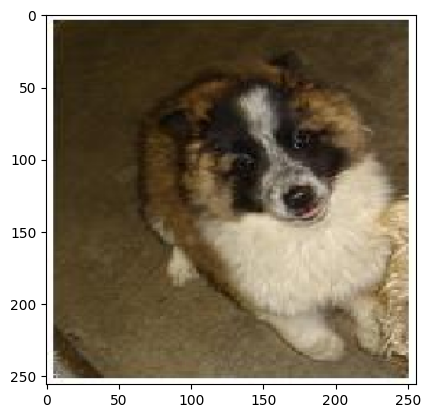

In [39]:
from tensorflow.keras.preprocessing import image
import numpy as np # Import numpy
import matplotlib.pyplot as plt # Make sure to import plt if not already imported

def predict_image(image_path):
    img = image.load_img(image_path, target_size=(256, 256)) # Changed target_size to (256, 256)
    plt.imshow(img) # Display the image
    img = image.img_to_array(img) # Using image.img_to_array
    img = np.expand_dims(img, axis=0) # Now np is recognized

    result = model.predict(img)
    print("Dog" if result >= 0.5 else "Cat")

predict_image('/content/8852.jpg')
predict_image('/content/9411.jpg')

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 34ms/step
Dog
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 34ms/step
Cat


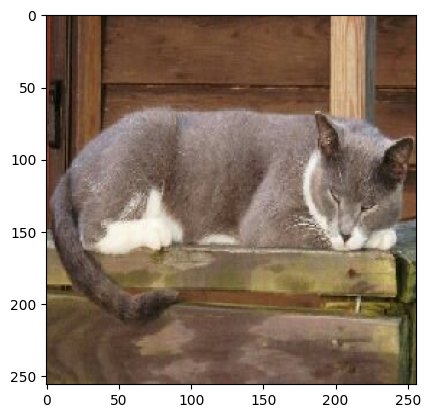

In [46]:
from tensorflow.keras.preprocessing import image
import numpy as np

def predict_image(image_path):
    img = image.load_img(image_path, target_size=(256, 256)) # Changed target_size to (256, 256)
    plt.imshow(img)
    img = image.img_to_array(img)
    img = np.expand_dims(img, axis=0)

    result = model.predict(img)
    print("Dog" if result >= 0.5 else "Cat")

predict_image('/content/9967.jpg')
predict_image('/content/932.jpg')

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 68ms/step
Cat


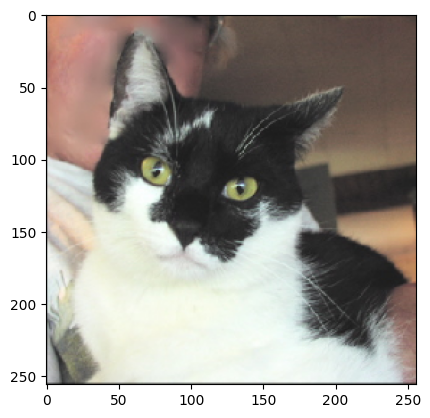

In [15]:
from tensorflow.keras.preprocessing import image
import numpy as np

def predict_image(image_path):
    img = image.load_img(image_path, target_size=(256, 256)) # Changed target_size to (256, 256)
    plt.imshow(img)
    img = image.img_to_array(img)
    img = np.expand_dims(img, axis=0)

    result = model.predict(img)
    print("Dog" if result >= 0.5 else "Cat")

predict_image('/content/999.jpg')

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 48ms/step
Dog


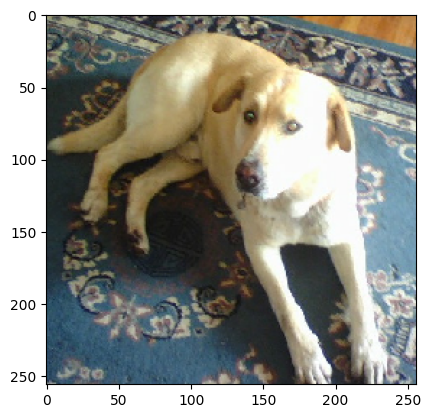

In [16]:
from tensorflow.keras.preprocessing import image
import numpy as np

def predict_image(image_path):
    img = image.load_img(image_path, target_size=(256, 256)) # Changed target_size to (256, 256)
    plt.imshow(img)
    img = image.img_to_array(img)
    img = np.expand_dims(img, axis=0)

    result = model.predict(img)
    print("Dog" if result >= 0.5 else "Cat")

predict_image('/content/8852.jpg')

image prediction

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 34ms/step
Dog


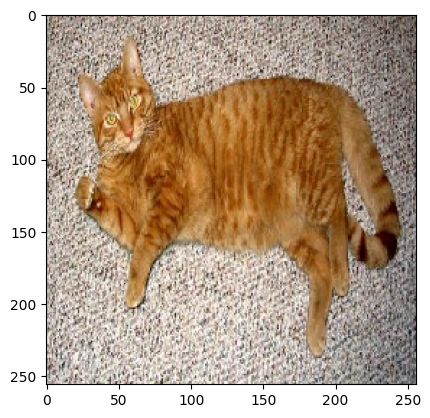

In [18]:
from tensorflow.keras.preprocessing import image
import numpy as np

def predict_image(image_path):
    img = image.load_img(image_path, target_size=(256, 256)) # Changed target_size to (256, 256)
    plt.imshow(img)
    img = image.img_to_array(img)
    img = np.expand_dims(img, axis=0)

    result = model.predict(img)
    print("Dog" if result >= 0.5 else "Cat")

predict_image('/content/997.jpg')

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 32ms/step
Dog


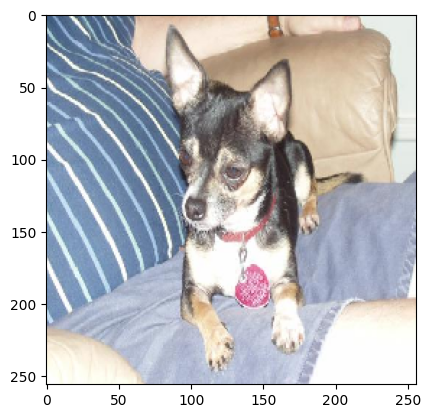

In [45]:
from tensorflow.keras.preprocessing import image
import numpy as np # Import numpy
import matplotlib.pyplot as plt # Make sure to import plt if not already imported

def predict_image(image_path):
    img = image.load_img(image_path, target_size=(256, 256)) # Changed target_size to (256, 256)
    plt.imshow(img) # Display the image
    img = image.img_to_array(img) # Using image.img_to_array
    img = np.expand_dims(img, axis=0) # Now np is recognized

    result = model.predict(img)
    print("Dog" if result >= 0.5 else "Cat")

predict_image('/content/9977.jpg')

image classification

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 32ms/step
Cat


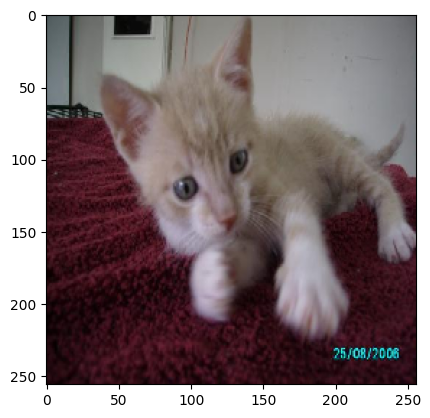

In [44]:
from tensorflow.keras.preprocessing import image
import numpy as np # Import numpy
import matplotlib.pyplot as plt # Make sure to import plt if not already imported

def predict_image(image_path):
    img = image.load_img(image_path, target_size=(256, 256)) # Changed target_size to (256, 256)
    plt.imshow(img) # Display the image
    img = image.img_to_array(img) # Using image.img_to_array
    img = np.expand_dims(img, axis=0) # Now np is recognized

    result = model.predict(img)
    print("Dog" if result >= 0.5 else "Cat")

predict_image('/content/9840.jpg')